In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
sb.set()

Reference Links: 

Link 1) https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

link 2) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

link 3) https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c 

Link 4) https://www.datacamp.com/tutorial/random-forests-classifier-python?utm_adgroupid=143216588577&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=655068781125&utm_targetid=dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=9062538

# Using Machine learning Model to predict Ratings

We would firstly have to convert certain datas to numerical values for easy representation later

In [2]:
df1 = pd.read_csv('anime_details_cleaned.csv')

In [3]:
df1 = df1.dropna()

In [4]:
name = df1.dtypes
pd.set_option('display.max_rows', 500)
print(name)

id                             int64
title                         object
mean                         float64
rank                         float64
popularity                     int64
num_list_users                 int64
num_scoring_users              int64
media_type                    object
status                        object
genres                        object
num_episodes                   int64
source                        object
rating                        object
studios                       object
start_season.year            float64
start_season.season           object
statistics.watching            int64
statistics.completed           int64
statistics.on_hold             int64
statistics.dropped             int64
statistics.plan_to_watch       int64
statistics.num_list_users      int64
dtype: object


In [5]:
# Conversion of ratings to num

df1['rating'] = df1['rating'].replace(['r'],1)
df1['rating'] = df1['rating'].replace(['pg_13'],2)
df1['rating'] = df1['rating'].replace(['r+'],3)
df1['rating'] = df1['rating'].replace(['g'],4)
df1['rating'] = df1['rating'].replace(['pg'],5)
df1['rating'] = df1['rating'].replace(['rx'],6)
df1['rating'] = df1['rating'].replace(['no rating'],7)

In [6]:
# Conversion of source to num
df1['source'] = df1['source'].replace(['manga'],1)
df1['source'] = df1['source'].replace(['visual_novel'],2)
df1['source'] = df1['source'].replace(['4_koma_manga'],3)
df1['source'] = df1['source'].replace(['original'],4)
df1['source'] = df1['source'].replace(['light_novel'],5)
df1['source'] = df1['source'].replace(['web_manga'],6)
df1['source'] = df1['source'].replace(['novel'],7)
df1['source'] = df1['source'].replace(['game'],8)
df1['source'] = df1['source'].replace(['web_novel'],9)
df1['source'] = df1['source'].replace(['other'],10)
df1['source'] = df1['source'].replace(['music'],11)
df1['source'] = df1['source'].replace(['mixed_media'],12)
df1['source'] = df1['source'].replace(['picture_book'],13)
df1['source'] = df1['source'].replace(['book'],14)
df1['source'] = df1['source'].replace(['card_game'],15)
df1['source'] = df1['source'].replace(['radio'],16)
df1['source'] = df1['source'].replace(['unknown'],17)

In [7]:
# conversion of studios
import ast 
df_studios = df1
# want to years from 1999 to 2023
lst = [x for x in range(1999, 2023)]
df_studios=df_studios[df_studios['start_season.year'].isin(lst)]
df_studios= df_studios.sort_values(('start_season.year'),ascending=False)
# df_dropped_studios=df_studios.drop(['start_season.year','start_season.season','statistics.watching','statistics.num_list_users','statistics.plan_to_watch','statistics.dropped','statistics.on_hold','statistics.completed','source','status'],axis=1)
df_studios['studio_name'] = df_studios['studios'].astype('str')

df_studios['studio_name'] = df_studios['studios'].apply(lambda x: ast.literal_eval(str(x)))

def studio_name(row):
    print(row['studio_name'][0]['name'])
    name = row['studio_name'][0]['name']
    return name

df_studios['studio_only'] = df_studios['studio_name'].apply(lambda x:
                                                x[0].get('name', '')
                                                if len(x) > 0 else 'no studio')
df1 = df_studios


In [8]:
# # getting the names of the top 30 studios

# df_studio_num = df1['studio_only'].value_counts()

# df_studio_num = pd.DataFrame(data=df_studio_num )

# df_studio_num= df_studio_num.nlargest(30, columns=['studio_only'], keep='first')

# df_studio_num= df_studio_num.reset_index()

# df_studio_num

# Conversion of studio_only to num
# df1['studio_only'] = df1['studio_only'].replace(['no studio'],0)
df1['studio_only'] = df1['studio_only'].replace(['Sunrise'],1)
df1['studio_only'] = df1['studio_only'].replace(['Toei Animation'],2)
df1['studio_only'] = df1['studio_only'].replace(['J.C.Staff'],3)
df1['studio_only'] = df1['studio_only'].replace(['Production I.G'],4)
df1['studio_only'] = df1['studio_only'].replace(['Madhouse'],5)
df1['studio_only'] = df1['studio_only'].replace(['Studio Deen'],6)
df1['studio_only'] = df1['studio_only'].replace(['A-1 Pictures'],7)
df1['studio_only'] = df1['studio_only'].replace(['OLM'],8)
df1['studio_only'] = df1['studio_only'].replace(['TMS Entertainment'],9)
df1['studio_only'] = df1['studio_only'].replace(['Bones'],10)
df1['studio_only'] = df1['studio_only'].replace(['Pierrot'],11)
df1['studio_only'] = df1['studio_only'].replace(['Gonzo'],12)
df1['studio_only'] = df1['studio_only'].replace(['Shaft'],13)
df1['studio_only'] = df1['studio_only'].replace(['Kyoto Animation'],14)
df1['studio_only'] = df1['studio_only'].replace(['Xebec'],15)
df1['studio_only'] = df1['studio_only'].replace(['SILVER LINK.'],16)
df1['studio_only'] = df1['studio_only'].replace(["Brain's Base"],17)
df1['studio_only'] = df1['studio_only'].replace(['Satelight'],18)
df1['studio_only'] = df1['studio_only'].replace(['Doga Kobo'],19)
df1['studio_only'] = df1['studio_only'].replace(['Shin-Ei Animation'],20)
df1['studio_only'] = df1['studio_only'].replace(['feel.'],21)
df1['studio_only'] = df1['studio_only'].replace(['ufotable'],22)
df1['studio_only'] = df1['studio_only'].replace(['Zexcs'],23)
df1['studio_only'] = df1['studio_only'].replace(['MAPPA'],24)
df1['studio_only'] = df1['studio_only'].replace(['LIDENFILMS'],25)
df1['studio_only'] = df1['studio_only'].replace(['Tatsunoko Production'],26)
df1['studio_only'] = df1['studio_only'].replace(['Wit Studio'],27)
df1['studio_only'] = df1['studio_only'].replace(['DLE'],28)
df1['studio_only'] = df1['studio_only'].replace(['AIC'],29)
df1['studio_only'] = df1['studio_only'].replace(['Gainax'],30)

df1['studio_only'] = pd.to_numeric(df1['studio_only'], errors='coerce').fillna(value=0).astype(int)


In [9]:
# Conversion of season to num
df1['start_season.season'] = df1['start_season.season'].replace(['spring'],1)
df1['start_season.season'] = df1['start_season.season'].replace(['winter'],2)
df1['start_season.season'] = df1['start_season.season'].replace(['fall'],3)
df1['start_season.season'] = df1['start_season.season'].replace(['summer'],4)

In [10]:
df1['watch_rate'] = (df1['statistics.completed'] + df1['statistics.watching']) / (df1['statistics.completed'] + df1['statistics.dropped'] + df1['statistics.on_hold'] + df1['statistics.watching'])
df1.drop(['statistics.watching','statistics.completed','statistics.on_hold','statistics.dropped'], axis=1, inplace=True)
df1.head()

id                                              title  mean    rank  \
4337  50544                                     Long She Yanyi  6.94  4338.0   
7829  50993                                         Shiyakusho  6.30  7830.0   
1570  50221                                         Shine Post  7.55  1571.0   
4951  43735                                               Cue!  6.81  4952.0   
4952  51782  Detective Conan: Love Story at Police Headquar...  6.81  4953.0   

      popularity  num_list_users  num_scoring_users media_type  \
4337       12538             958                265        ona   
7829       15785             379                146        ona   
1570        4502           19959               5517         tv   
4951        4146           24049               6782         tv   
4952       12547             955                376    special   

               status                                             genres  ...  \
4337  finished_airing  [{'id': 1, 'name': 'Action'}, {'id': 17, 'name...  ...   
7829  finished_airing  [{'id': 42, 'name': 'Seinen'}, {'id': 36, 'nam...  ...   
1570  finished_airing  [{'id': 60, 'name': 'Idols (Female)'}, {'id': ...  ...   
4951  finished_airing  [{'id': 19, 'name': 'Music'}, {'id': 75, 'name...  ...   
4952  finished_airing  [{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...  ...   

      source  rating                                            studios  \
4337       9       2     [{'id': 2471, 'name': 'Wonder Cat Animation'}]   
7829       1       2         [{'id': 1340, 'name': 'Typhoon Graphics'}]   
1570       5       2               [{'id': 1997, 'name': 'Studio Kai'}]   
4951       8       2  [{'id': 96, 'name': 'Yumeta Company'}, {'id': ...   
4952       1       2          [{'id': 73, 'name': 'TMS Entertainment'}]   

     start_season.year  start_season.season  statistics.plan_to_watch  \
4337            2022.0                    2                       215   
7829            2022.0                    2                       121   
1570            2022.0                    4                      9126   
4951            2022.0                    2                     10213   
4952            2022.0                    1                       304   

      statistics.num_list_users  \
4337                        958   
7829                        379   
1570                      19963   
4951                      24051   
4952                        955   

                                            studio_name studio_only  \
4337     [{'id': 2471, 'name': 'Wonder Cat Animation'}]           0   
7829         [{'id': 1340, 'name': 'Typhoon Graphics'}]           0   
1570               [{'id': 1997, 'name': 'Studio Kai'}]           0   
4951  [{'id': 96, 'name': 'Yumeta Company'}, {'id': ...           0   
4952          [{'id': 73, 'name': 'TMS Entertainment'}]           9   

      watch_rate  
4337    0.850606  
7829    0.852713  
1570    0.873304  
4951    0.693453  
4952    0.909370  

[5 rows x 21 columns]

# Comparing the variables of start_season.year VS mean score
Representation of their relationships

<AxesSubplot:xlabel='start_season.year', ylabel='mean'>

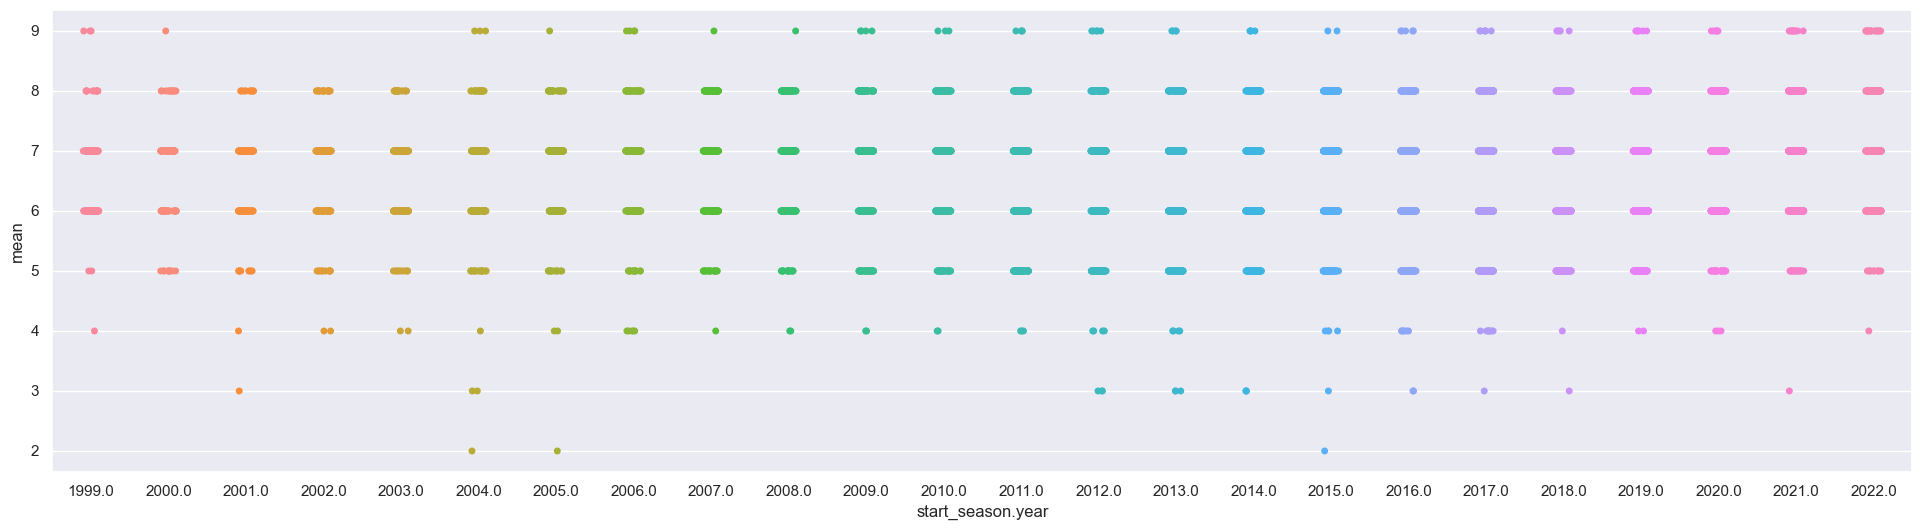

In [11]:
x = pd.DataFrame(df1['start_season.year'])
y = pd.DataFrame(df1['mean'].round())

# Split dataset to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

# Create a joint dataframe by concatenating rating and mean
trainDF = pd.concat([x_train, y_train], axis = 1).reindex(x_train.index)

# Joint Swarmplot of mean Train against start_season.year Train
f = plt.figure(figsize=(24, 6))
sb.stripplot(x = "start_season.year", y = "mean", data = trainDF, orient = "v")

# Analysis
* A trend can be seen where the mean score of the anime increases over the years. Thus, we decided to use start_season.year as a variable to mean score

# Decision tree
Using year when the season start to predict the score of the anime

[Text(0.49583333333333335, 0.9166666666666666, 'Start_season.Year <= 2009.5\ngini = 0.698\nsamples = 7640\nvalue = [3, 18, 57, 747, 2557, 3048, 1116, 94]\nclass = 4.0'),
 Text(0.21666666666666667, 0.75, 'Start_season.Year <= 2005.5\ngini = 0.67\nsamples = 1933\nvalue = [2, 3, 19, 151, 532, 919, 289, 18]\nclass = 4.0'),
 Text(0.1, 0.5833333333333334, 'Start_season.Year <= 1999.5\ngini = 0.666\nsamples = 964\nvalue = [2, 3, 9, 73, 309, 442, 118, 8]\nclass = 4.0'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.625\nsamples = 116\nvalue = [0, 0, 1, 2, 48, 51, 11, 3]\nclass = 4.0'),
 Text(0.13333333333333333, 0.4166666666666667, 'Start_season.Year <= 2001.5\ngini = 0.67\nsamples = 848\nvalue = [2, 3, 8, 71, 261, 391, 107, 5]\nclass = 4.0'),
 Text(0.06666666666666667, 0.25, 'Start_season.Year <= 2000.5\ngini = 0.653\nsamples = 220\nvalue = [0, 1, 1, 19, 68, 106, 24, 1]\nclass = 4.0'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.679\nsamples = 96\nvalue = [0, 0, 0, 10

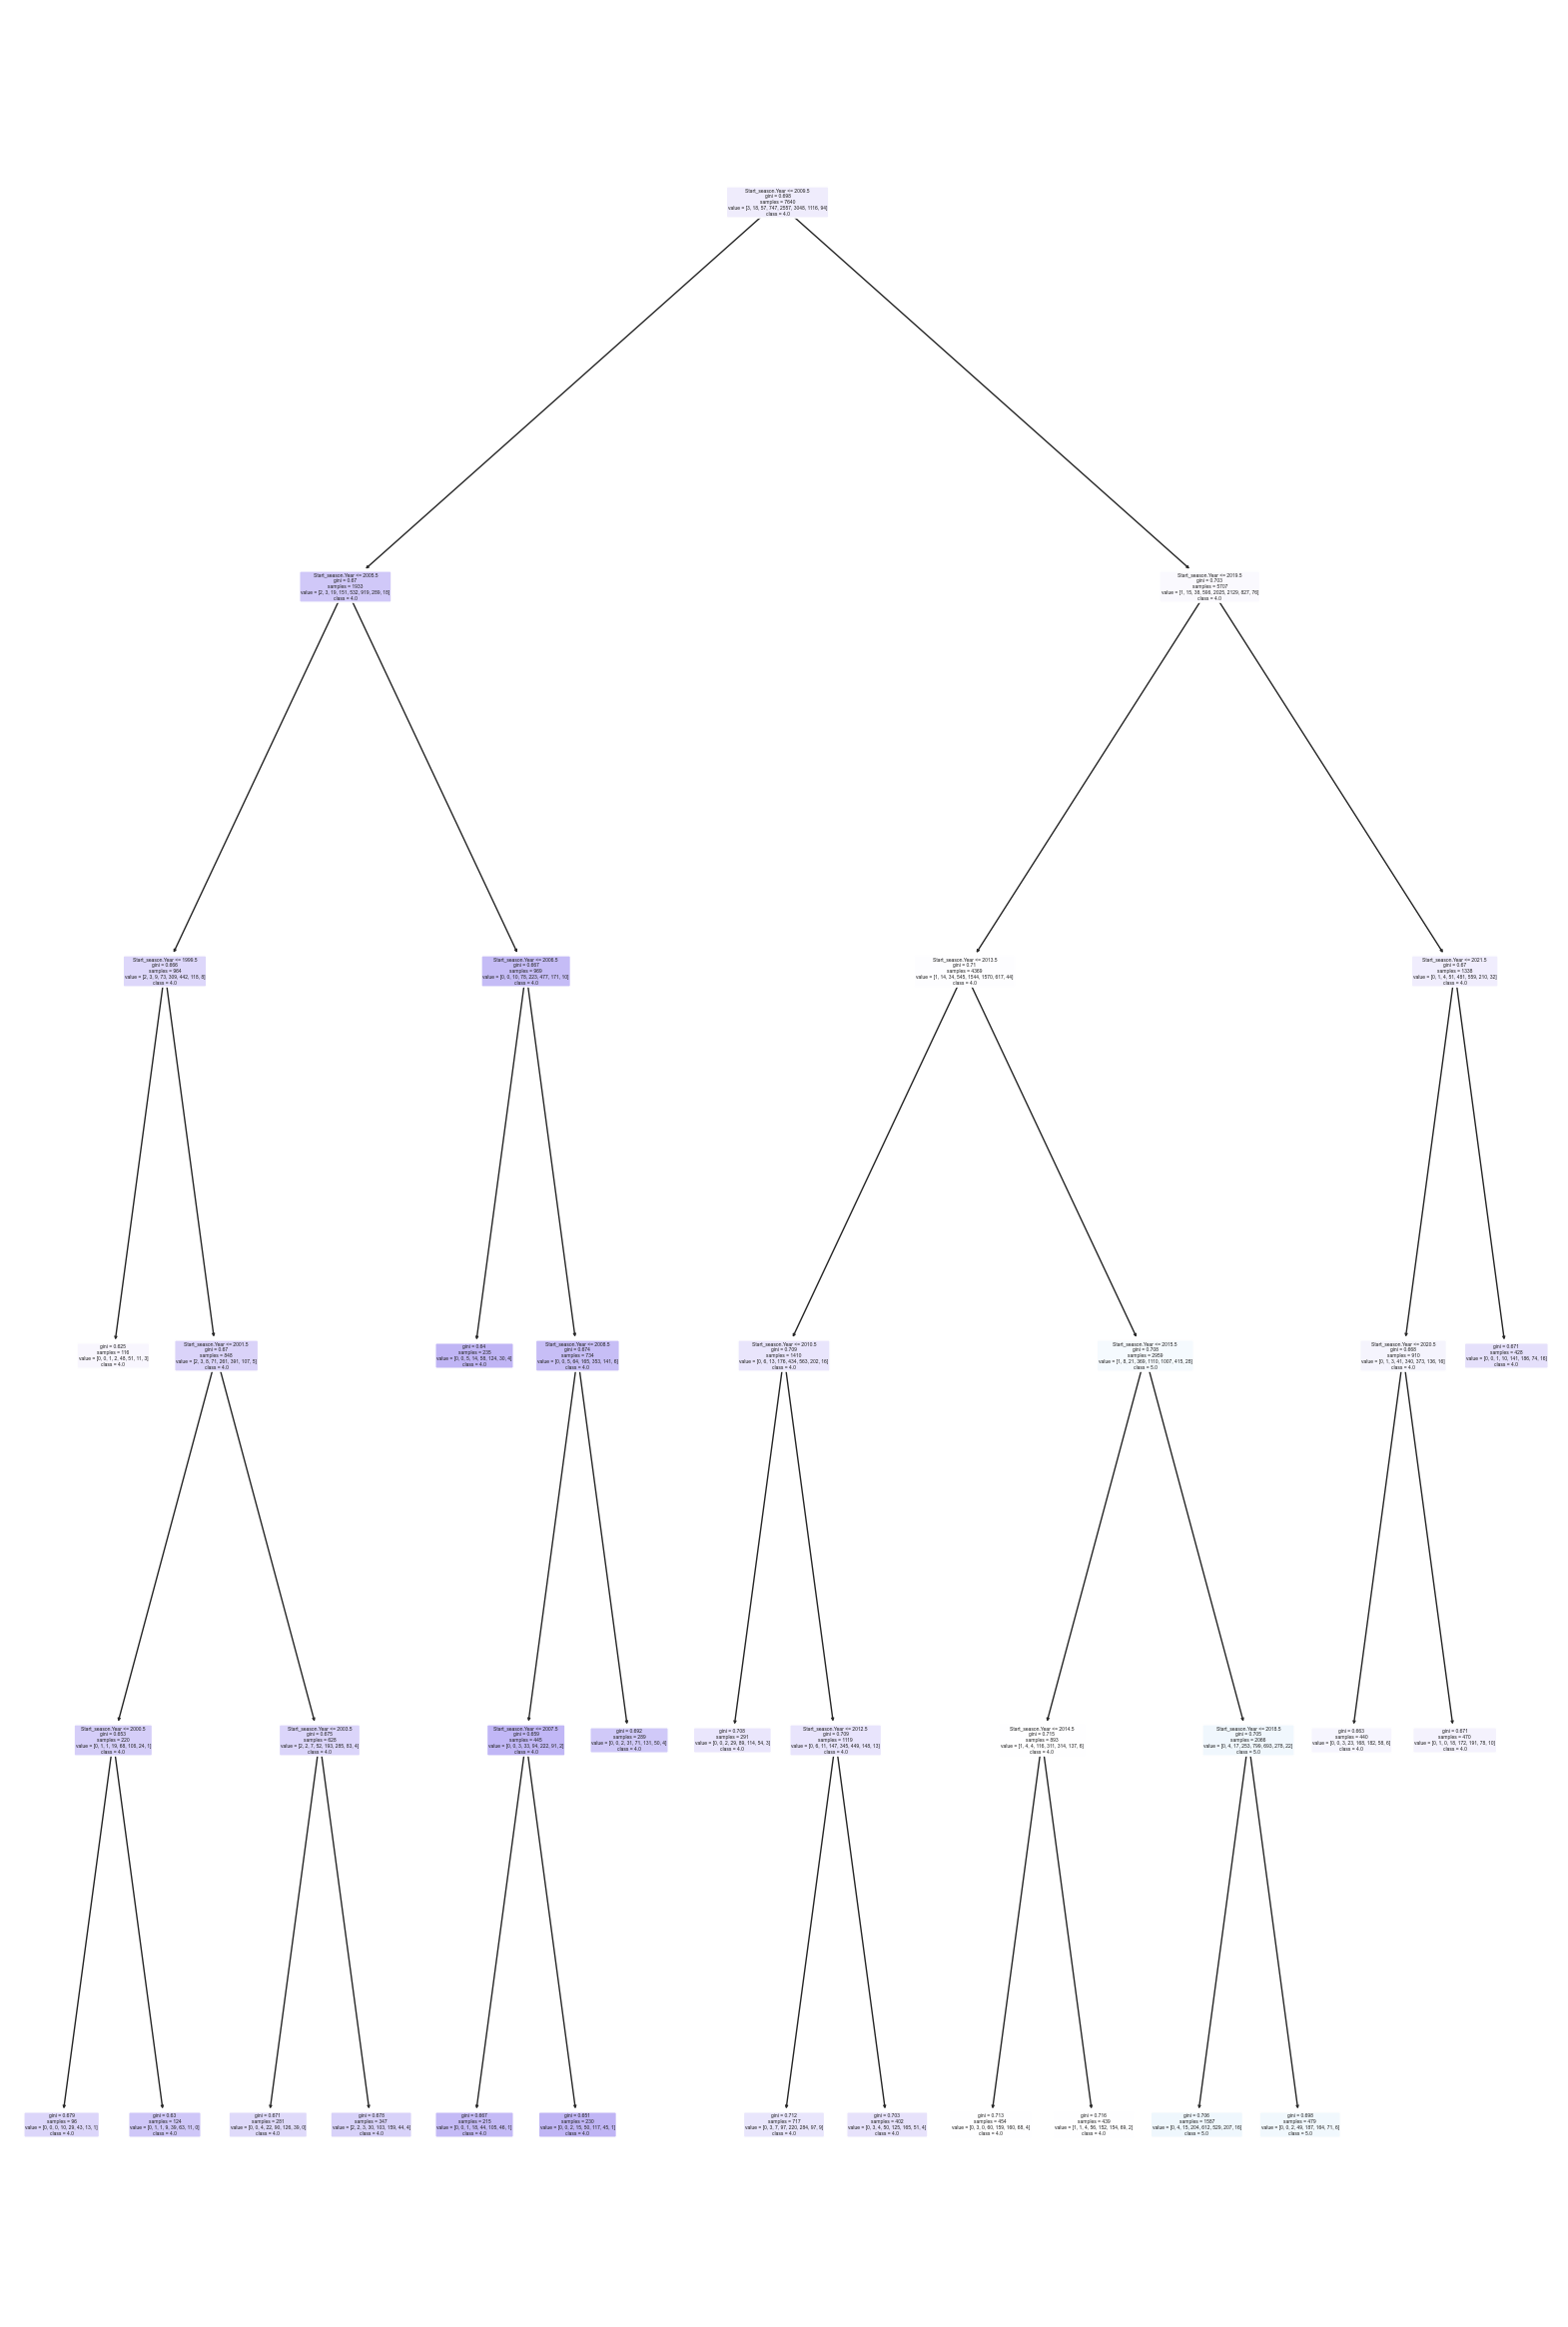

In [12]:
# Create a Decision Tree Classifier object(Depth 5)
dectree = DecisionTreeClassifier(max_depth = 5)

# Train the Decision Tree Classifier model
dectree.fit(x_train, y_train)


f = plt.figure(figsize=(20,30))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Start_season.Year"], 
          class_names=["9.0","8.0","7.0", "6.0","5.0", "4.0", "3.0", "2.0"])

Model 1 (Max depth: 5)
Classification Accuracy(Train) 	: 0.41282722513089004
Classification Accuracy(Test) 	: 0.4031413612565445


<AxesSubplot:>

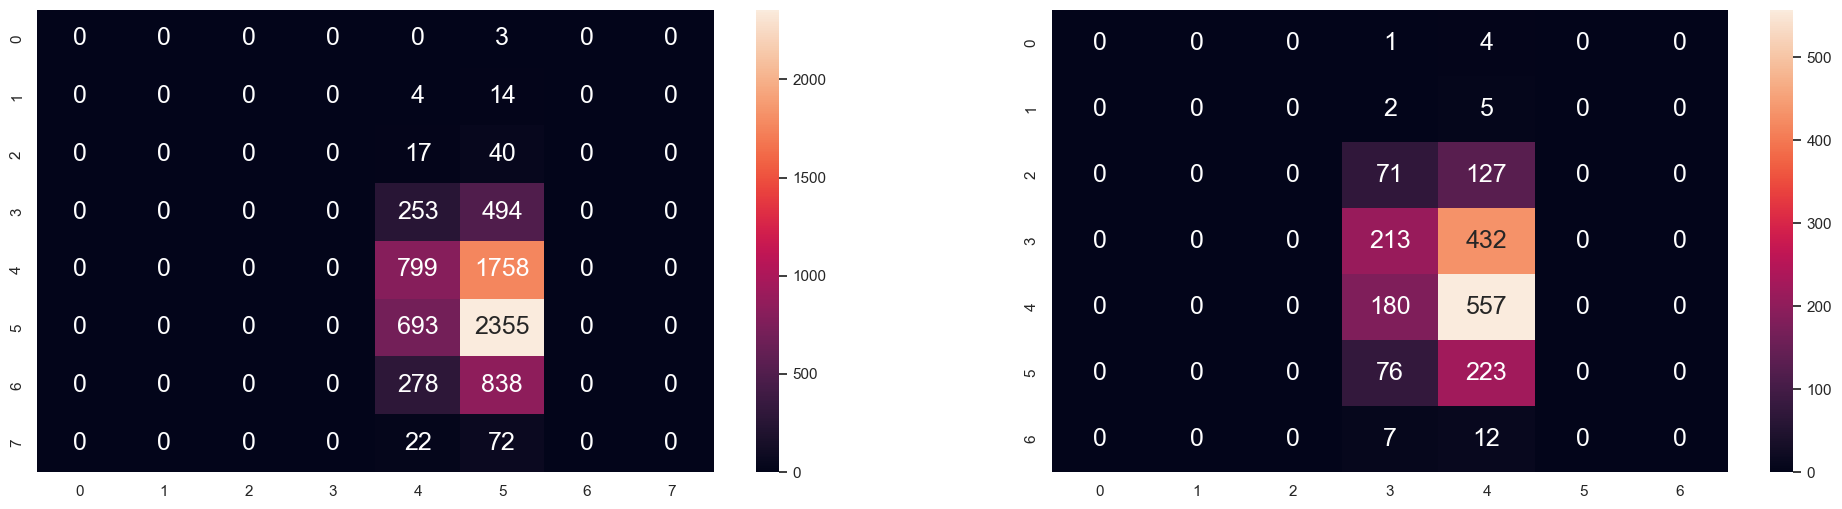

In [13]:
# FOR MAX DEPTH 5
print("Model 1 (Max depth: 5)")

f, axes = plt.subplots(1, 2, figsize=(24, 6))

# Predict Legendary corresponding to CA Train
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Classification Accuracy(Train) \t:", dectree.score(x_train, y_train))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

# Predict Legendary corresponding to CA Test
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Classification Accuracy(Test) \t:", dectree.score(x_test, y_test))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Analysis
* From the classification tree, the use of the year an anime season starts to predict the rating of the anime is not a good predictor at an accuracy of 0.409 and we should more variables for better accuracy

# Decision tree with more variables

We decided to use decision tree with a variety of variables  to get a more accurate prediction for determining the anime score.

As mentioned previously using the random forest to find the relevant datas to be used, we would be using 'start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity'.

In [14]:
dectree = DecisionTreeClassifier(max_depth=50)

In [15]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
x = df1[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']]
y = df1['mean'].round()

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

dectree.fit(x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']],y_train)

treedot = export_graphviz(dectree,feature_names = x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']].columns,out_file=None,filled=True,rounded=True,special_characters=True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')


graphviz.Source(treedot)

In [18]:
DT_predtrain = dectree.predict(x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']])
DT_predtest = dectree.predict(x_test[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']])

In [19]:
print("Classification Accuracy on Train data: ", dectree.score(x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']],y_train))
print("Classification Accuracy on Test data: ", dectree.score(x_test[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']],y_test))

Classification Accuracy on Train data:  1.0
Classification Accuracy on Test data:  0.5041884816753927


# Analysis
* Using the decision tree method we do see an improvement in predicting test data from around 0.408 to 0.563 but can it be better?

# Random forrest
Next, we decided to use the random forrest method to see if we can gather a more accurate prediction

In [20]:
x = df1[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']]
y = df1['mean'].round()

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Fitting of random forrest classifier
Model = RandomForestClassifier(n_estimators = 100)
Model.fit(x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']],y_train)

RandomForestClassifier()

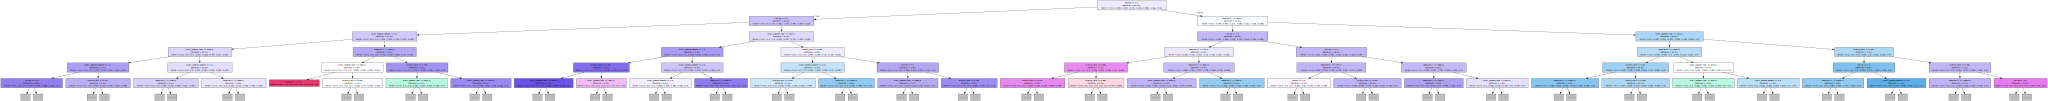

In [21]:
tree = Model.estimators_[50]
dot_data = export_graphviz(tree,
                           feature_names=['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity'],  
                           filled=True,  
                           max_depth=5, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [22]:
# Predict test and train
RFC_pred = Model.predict(x_test[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']])
RFC_predtrain = Model.predict(x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']])

print("Train Model Accuracy:",metrics.accuracy_score(y_train, Model.predict(x_train[['start_season.year','rating','source','watch_rate', 'start_season.season', 'popularity']])))
print("Prediction Accuracy:",metrics.accuracy_score(y_test, RFC_pred))

Train Model Accuracy: 1.0
Prediction Accuracy: 0.6057591623036649


# Analysis
* This is another improvement making random forrest the best among the 3 prediction models at 0.606 thus far. 

But can we better refine the data used by including data that can better determine the score of the anime?


# Conclusion
By incorporating additional relevant data and utilizing the Random Forest algorithm to predict anime scores, we can enhance our ability to discern high-quality anime and make informed decisions about what constitutes a good anime.

While this approach can provide insight into what factors make a good anime, it is also susceptible to bias and overfitting, requires careful tuning, and can be limited by data availability. Nevertheless, with proper attention to these potential drawbacks, Random Forest can be a valuable tool for anime enthusiasts seeking to identify the best titles to watch.

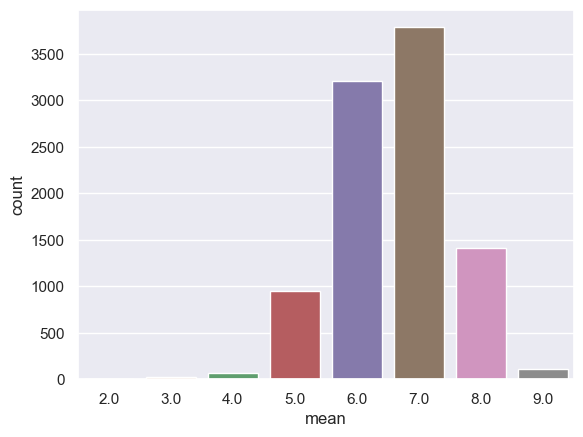

In [30]:
df1['mean'] = df1['mean'].round(0)
sb.countplot(x="mean", data=df1)
plt.show()

# Conclusion - Classification limitations

When examining the distribution of classes, it is evident that the data is heavily skewed, with the majority of instances belonging to the average ratings of 6 and 7. As a result, classification models may face several limitations.

For instance, relying on metrics such as accuracy can be misleading since the model could attain high accuracy by solely predicting the majority class, which would not be useful in practical scenarios. Moreover, models trained on an imbalanced dataset may not be able to generalize effectively to new, unseen data as the patterns learned by the model might not accurately represent the actual underlying distribution.

As a potential future direction, resampling techniques such as oversampling or undersampling, which are readily available in the scikit-learn library, can be explored to address the issue of class imbalance in the dataset. Alternatively, obtaining a more balanced dataset could also be a viable solution.

Moreover, the significant class imbalance could suggest that regression models such as ridge regression or simple linear regression, which are designed for continuous data, may be more suitable than classification models such as random forest or k-means clustering, which are primarily intended for categorical data.